In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence_element in enumerate(sequences):
        results[i, sequence_element] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [12]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0708 13:14:19.858704 140736017658688 deprecation.py:323] From /Users/zeba/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 254us/sample - loss: 0.4877 - acc: 0.7923 - val_loss: 0.3625 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.2793 - acc: 0.9085 - val_loss: 0.3056 - val_acc: 0.8806
Epoch 3/20
15000/15000 [==============================] - 2s 117us/sample - loss: 0.2076 - acc: 0.9288 - val_loss: 0.2747 - val_acc: 0.8911
Epoch 4/20
15000/15000 [==============================] - 2s 127us/sample - loss: 0.1663 - acc: 0.9449 - val_loss: 0.2779 - val_acc: 0.8891
Epoch 5/20
15000/15000 [==============================] - 2s 142us/sample - loss: 0.1307 - acc: 0.9583 - val_loss: 0.3475 - val_acc: 0.8695
Epoch 6/20
15000/15000 [==============================] - 2s 116us/sample - loss: 0.1085 - acc: 0.9676 - val_loss: 0.3006 - val_acc: 0.8846
Epoch 7/20
15000/15000 [==============================] - 2s 117us/sample - loss: 0.0914 - acc: 0.9737 - val_l

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

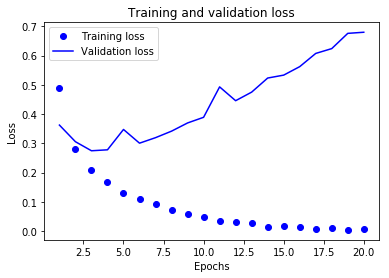

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

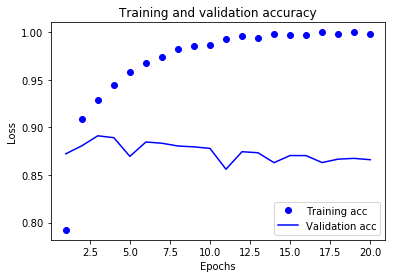

In [22]:
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 94us/sample - loss: 0.4727 - accuracy: 0.8069
Epoch 2/4
25000/25000 [==============================] - 2s 84us/sample - loss: 0.2663 - accuracy: 0.9083
Epoch 3/4
25000/25000 [==============================] - 2s 82us/sample - loss: 0.2053 - accuracy: 0.9274
Epoch 4/4
25000/25000 [==============================] - 5s 182us/sample - loss: 0.2905 - accuracy: 0.8851


In [24]:
results

[0.29046058468818664, 0.88508]